# Basic classification: Classify images of clothing

Author: Amir Fawwaz

Affliation: HT Consulting (Asia) Sdn. Bhd., Kelana Jaya, Malaysia

Published: 19 July 2024

##### Copyright Kaggle

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [12]:
data_train = pd.read_csv('fashion_data/fashion-mnist_train.csv')
data_test = pd.read_csv('fashion_data/fashion-mnist_test.csv')

In [13]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [1]:
# import the libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# load the data
digits = datasets.load_digits()
pd = datasets.load_digits()
print('Digits dictionary content \n{}'.format(digits.keys()))  # and see whai it is

Digits dictionary content 
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


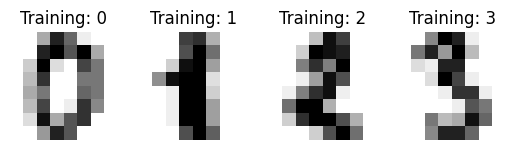

In [2]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)



In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


## Decision Tree

In [4]:
from sklearn import tree
class_tree=tree.DecisionTreeClassifier()
class_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = class_tree.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 86.666667%


Around 85% without any parametrers tunning. Not bad, but let's test the accuracy of a Logistic Regression

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression


class_logistic = LogisticRegression()
class_logistic.fit(X_train, y_train)

y_pred = class_logistic.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 96.000000%


C:\Users\User\Downloads\MYJRP_ENV\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


97%, wow!

## Multi-layer Perceptron

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#input data normalization
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


mlp = MLPClassifier()  #default
# Train the classifier with the traning data
mlp.fit(X_train_scaled,y_train)
y_pred = mlp.predict(X_test_scaled)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 97.555556%


## Naive Bayes classifier.

In [12]:
from sklearn.naive_bayes import MultinomialNB
 
classifier_naive = MultinomialNB()
classifier_naive.fit(X_train, y_train)
y_pred  = classifier_naive.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 92.444444%


## K-Nearest Neighbors classifier

In [13]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred  = knn.predict(X_test)
print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 99.111111%


## Support Vector Machine (SVM)

In [14]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)  # as is in https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
#fit to the trainin data
svm_classifier.fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)

print("Accuracy of model = %2f%%" % (accuracy_score(y_test, y_pred )*100))

Accuracy of model = 99.555556%


| Algorithm    | Score Accuracy |
| -------- | ------- |
| Decision Tree  | 86.666667%    |
| Logistic Regression  | 96.000000%    |
| MLP  | 97.555556%   |
| Naive Bayes  | 92.444444%    |
| KNN | 99.111111%     |
| SVM    | 99.555556%   |

From all evaluation from testing sample, SVM seems to give finest result.

In [16]:
from sklearn.metrics import  classification_report
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (svm_classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        46
           6       1.00      1.00      1.00        46
           7       1.00      0.98      0.99        50
           8       1.00      0.98      0.99        53
           9       0.96      1.00      0.98        26

    accuracy                           1.00       450
   macro avg       0.99      1.00      0.99       450
weighted avg       1.00      1.00      1.00       450




Confusion matrix, without normalization
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  1]
 [ 0  1  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  0 26]]


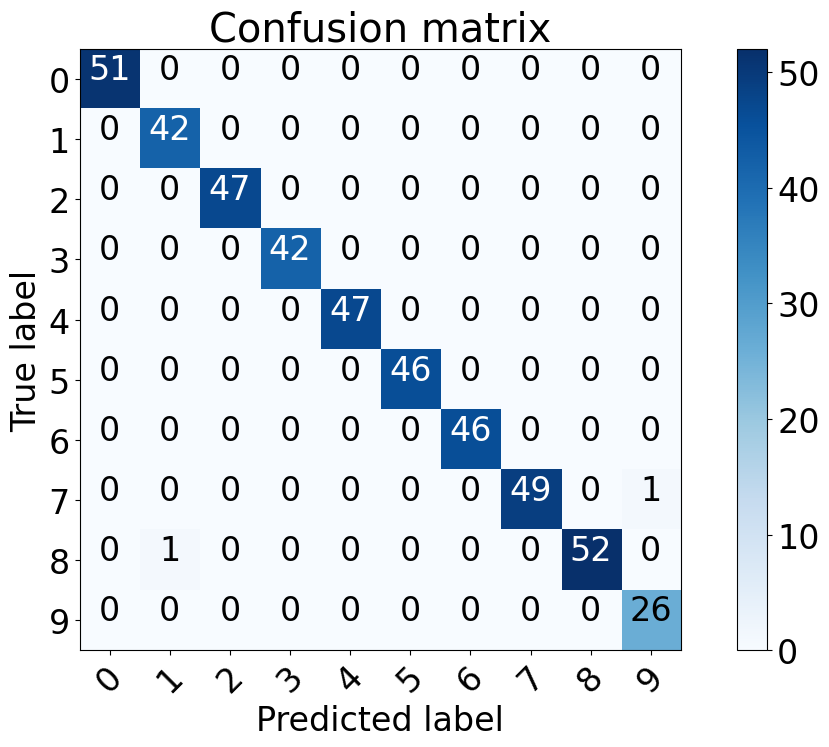

In [19]:


from sklearn.metrics import confusion_matrix
import itertools
#function to plot the Confusion Matrix using matplotlib
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams['figure.figsize'] = (12,8) # set the plot size
    plt.rcParams['font.size']= (24)
    plt.tight_layout()
    
target_names=digits.target_names 
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()